# Predicting Credit Card Fraud
Credit card fraud is one of the leading causes of identify theft around the world. In 2018 alone, over $24 billion were stolen through fraudulent credit card transactions. Financial institutions employ a wide variety of different techniques to prevent fraud, one of the most common being Logistic Regression.

Data Source: https://www.kaggle.com/datasets/ealaxi/paysim1

<img src="c.jpg" alt="drawing" width="800" height="100" align = "left">

### Case Study Objectives

- Use Logistic Regression and create a predictive model to determine if a transaction is fraudulent or not.
- Discuss your findings.
- What conclusion and recommendations can you derive from your analysis?

`Data Dictionary:`
1. `amount` - amount of the transaction in local currency.
2. `nameOrig` - customer who started the transaction
3. `oldbalanceOrg` - initial balance before the transaction
4. `newbalanceOrig` - new balance after the transaction
5. `nameDest` - customer who is the recipient of the transaction
6. `oldbalanceDest` - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
7. newbalanceDest` - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
8. `isFraud` - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

#### Load the Data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('transactions.csv')
df.shape

(199999, 10)

#### Data Exploration

In [3]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,158007.12,C424875646,0.00,0.00,C1298177219,474016.32,1618631.97,0
1,236,CASH_OUT,457948.30,C1342616552,0.00,0.00,C1323169990,2720411.37,3178359.67,0
2,37,CASH_IN,153602.99,C900876541,11160428.67,11314031.67,C608741097,3274930.56,3121327.56,0


In [41]:
# Checking count nad percentage for isFraud
df['isFraud'].value_counts()

0    199717
1       282
Name: isFraud, dtype: int64

In [42]:
282/len(df)  * 100

0.14100070500352502

There are only 0.14% of fraudelent transactions in our data.

Fraudelent transactions mostly occurs during CASH OUT and TRANSFER transactions.

(0.0, 6000000.0)

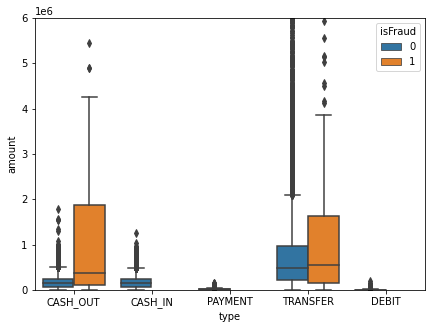

In [78]:
# sns.boxplot(x = "type", y = "amount", hue = "isFraud", palette = "pastel", data = df)
plt.figure(figsize=(7, 5)) 
sns.boxplot(x = 'type', y = 'amount', hue = 'isFraud', data=df)
plt.ylim(0,6000000)

Looking at the dataset, combined with our knowledge of credit card transactions in general, we can see that there are a few interesting columns to look at. We know that the `amount` and transaction `type` is going to be important as well as `oldbalanceOrg` and `oldbalanceDest`.

In [79]:
# Summary statistics 
# df[['amount', 'type', 'oldbalanceOrg', 'oldbalanceDest']].describe(include='all')

In [81]:
# transaction type
# df.type.unique()

We have a lot of information about the type of transaction we are looking at. Let’s create a new column called `isPayment` that assigns a 1 when `type` is “PAYMENT” or “DEBIT”, and a 0 otherwise.

In [8]:
# Create isPayment field
# Ignore warnings, our code works fine
import warnings
warnings.filterwarnings('ignore')

df['isPayment'] = 0
df['isPayment'][df.type.isin(['PAYMENT','DEBIT'])] = 1

We have a lot of information about the type of transaction we are looking at. But there are two transactions type that caught our attention. Let's create a column called `isMovement`, which will capture if money moved out of the origin account. This column will have a value of 1 when `type` is either “CASH_OUT” or “TRANSFER”, and a 0 otherwise.

In [9]:
df['isMovement'] = 0
df['isMovement'][df.type.isin(['CASH_OUT', 'TRANSFER'])] = 1


With financial fraud, another key factor to investigate would be the `difference in value between the origin and destination account`. Our theory, in this case, being that destination accounts with a significantly different value could be suspect of fraud. 

Let’s create a column called `accountDiff` with the absolute difference of the `oldbalanceOrg` and `oldbalanceDest` columns.

In [10]:
df['accountDiff'] = abs(df['oldbalanceDest'] - df['oldbalanceOrg'])

In [82]:
# compare columns
# df[['oldbalanceOrg', 'oldbalanceDest', 'accountDiff']].head(4)

In [83]:
model = LogisticRegression()

In [ ]:
model.fit()

#### Select and Split the Data

In [12]:
# Define x and y
features = df[['amount', 'isPayment', 'isMovement', 'accountDiff' ]]
label = df[['isFraud']]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, label,  test_size = 0.30)

In [14]:
features

,amount,isPayment,isMovement,accountDiff
0,158007.12,0,1,474016.32
1,457948.30,0,1,2720411.37
2,153602.99,0,0,7885498.11
3,49555.14,0,1,10865.00
4,29648.02,0,1,56933.09
...,...,...,...,...
199994,1274.97,1,0,69376.00
199995,204041.98,0,1,40423.00
199996,66378.61,0,0,2588672.49
199997,87473.93,0,0,1429025.02


#### Normalize the Data
Our features must be in the same scale

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_train

array([[-0.13507976, -0.72514923,  1.13558273, -0.38387692],
       [-0.18621676, -0.72514923,  1.13558273,  0.44155656],
       [-0.27076551,  1.3790265 , -0.88060515, -0.30358676],
       ...,
       [-0.27105759, -0.72514923,  1.13558273, -0.34847392],
       [ 0.28132628, -0.72514923,  1.13558273, -0.28117916],
       [-0.08884069, -0.72514923, -0.88060515, -0.34162462]])

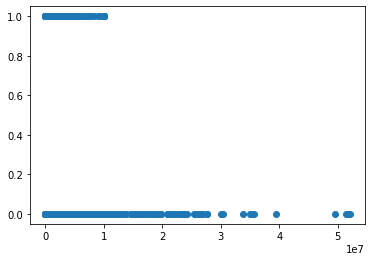

In [17]:
plt.scatter(df['amount'], df['isFraud'])

In [18]:
print(x_train.shape)
print(y_train.shape)

(139999, 4)
(139999, 1)


#### Fit the model to the training data

In [19]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

#### Score the model both training and testing data

In [20]:
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.9985571325509468
0.9986


#### Model coefficients

In [21]:
lr.coef_

array([[ 0.2444423 , -0.73965807,  2.25872662, -0.68610553]])

#### Predict With the Model

In [22]:
# Scenario data
transaction1 = np.array([[123456.78, 0.0, 1.0, 54670.1]])
transaction2 = np.array([[98765.43, 1.0, 0.0, 8524.75]])
transaction3 = np.array([[99999999,1,1,9999999]])

In [23]:
print(lr.predict(transaction3))

[1]


In [24]:
your_transaction = np.array([6470000000, 1, 1, 111111111])

In [25]:

# sample_transactions = np.stack((transaction1,transaction2,transaction3,your_transaction))

In [26]:
# your_transactions = scaler.transform(your_transaction)

In [1]:
# print(lr.predict_proba(sample_transactions))

#### Work in Progress .. . . . ;)